In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')
#load the dataset 
RE_data= pd.read_excel("C:\\Users\\ASUS\\Downloads\\archive (3)\\Online Retail.xlsx")
#fetching the 5 frist records 
RE_data.head(5)




,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
RE_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [3]:
print("The number of  the rows in the dataset :{} ".format(RE_data.shape[0]))
print("the number of the columns in the dataset : {}".format(RE_data.shape[1]))

The number of  the rows in the dataset :541909 
the number of the columns in the dataset : 8


In [4]:
# select numeric columns
numeric_df = RE_data.select_dtypes(include=[np.number])
numeric_cols = numeric_df.columns.values
print("The numeric columns are : {}".format(numeric_cols))


# select non-numeric columns
df_non_numeric = RE_data.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are : {}".format(non_numeric_cols))

The numeric columns are : ['Quantity' 'UnitPrice' 'CustomerID']
The non-numeric columns are : ['InvoiceNo' 'StockCode' 'Description' 'InvoiceDate' 'Country']


In [5]:
# Total number of missing values
RE_data.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
#percentage of missing values
RE_data.isnull().mean()*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [9]:
# scince the percentage is less than 5% dropping the null values in Description records 
RE_data.dropna(subset=['Description'], inplace=True)


In [10]:
#checking if there is oan outlier
RE_data['Quantity'].describe()

count    540455.000000
mean          9.603129
std         218.007598
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [11]:
#dropping the records with outlier values(>100)
Qua_index_drop = RE_data[RE_data['Quantity']>100].index

RE_data.drop(index=Qua_index_drop, inplace=True , axis=0)

In [12]:
#dropping the records with outlier values(<100)
Qua_index_drop = RE_data[RE_data['Quantity']<0].index
RE_data.drop(index=Qua_index_drop, inplace=True , axis=0)

In [13]:
#checking the unitPrice with 0.00 values 
Zero_price=RE_data[RE_data.UnitPrice ==0.00][['UnitPrice', 'Description']]
print(Zero_price)

        UnitPrice                       Description
6391          0.0                            amazon
6392          0.0                            amazon
9302          0.0      ROUND CAKE TIN VINTAGE GREEN
14335         0.0      CREAM SWEETHEART LETTER RACK
14336         0.0  ZINC WILLIE WINKIE  CANDLE STICK
...           ...                               ...
524375        0.0                             found
524474        0.0                            dotcom
524622        0.0                            Amazon
535325        0.0                             check
535334        0.0                             check

[541 rows x 2 columns]


In [15]:
#droppin the records with 0.00 values
ZERO_unit_price_index=RE_data[RE_data.UnitPrice==0.00].index
RE_data.drop(index=ZERO_unit_price_index,inplace=True,axis=0)

In [16]:
#separate the invoicDate to TimeOnly
RE_data['TimeOnly']=RE_data.InvoiceDate.dt.time

In [17]:
RE_data['TimeOnly']

0         08:26:00
1         08:26:00
2         08:26:00
3         08:26:00
4         08:26:00
            ...   
541904    12:50:00
541905    12:50:00
541906    12:50:00
541907    12:50:00
541908    12:50:00
Name: TimeOnly, Length: 525257, dtype: object

In [18]:
RE_data['CustomerID'].value_counts()

CustomerID
17841.0    7842
14911.0    5615
14096.0    5110
12748.0    4573
14606.0    2700
           ... 
18087.0       1
13841.0       1
17923.0       1
17102.0       1
18251.0       1
Name: count, Length: 4303, dtype: int64

In [19]:
Zero_Cus_index=RE_data[RE_data.CustomerID==0].index
RE_data.drop(index=Zero_Cus_index,inplace=True,axis=0)

In [20]:
RE_data['Description'].nunique()

4020

In [21]:
RE_data['CustomerID'].count()

393225

In [22]:
RE_data['Profit']=RE_data['Quantity']*RE_data['UnitPrice']

In [23]:
RE_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TimeOnly,Profit
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,08:26:00,20.34


In [24]:
RE_data['InvoiceDate']= pd.to_datetime(RE_data['InvoiceDate'])

In [25]:
# Maximum InvoiceDate or the latest  date.
max_trans_date = max(RE_data['InvoiceDate']).date()
max_trans_date


datetime.date(2011, 12, 9)

In [26]:
# Taking the last transaction date as a reference date for comparision and 
# finding the number of days between a transaction date and last transaction date to compute the recency.

comparison_date= datetime.strptime(str(max_trans_date), "%Y-%m-%d")


In [27]:
# Creating a RFM table that will contain all the values for recency , frequency and Monetray data. 

rfm_table = RE_data.groupby(['CustomerID']).agg({'InvoiceDate': lambda date : (comparison_date - date.max()).days,
                                                            'Quantity' : lambda Quan : len(Quan), 
                                                            'Profit' : lambda p : sum(p),
                                                 'Country' : lambda q:q.unique()})

In [28]:
#  Renaming of the columns to appropiate name is needed

rfm_table.columns

Index(['InvoiceDate', 'Quantity', 'Profit', 'Country'], dtype='object')

In [30]:
# Renaming column names to appropiate names

rfm_table.rename(columns={'InvoiceDate' : 'Recency', 
                        'Quantity' : 'Frequency',
                        'Profit' : 'Monetary'} , inplace=True)

In [31]:
# Dividing the recency, frequency and monetary into 4 quartiles (min, 25%, 50%, 75% and max).
# These values will help us to calculate RFM score for a customer and classify based on their RFM score.

rfm_table['R_quartile'] = pd.qcut(rfm_table['Recency'], 4, ['4','3','2','1'])
rfm_table['F_quartile'] = pd.qcut(rfm_table['Frequency'], 4, ['1','2','3','4'])
rfm_table['M_quartile'] = pd.qcut(rfm_table['Monetary'], 4, ['1','2','3','4'])

In [32]:
# RFM_table dataset

rfm_table

,Recency,Frequency,Monetary,Country,R_quartile,F_quartile,M_quartile
CustomerID,,,,,,,
12347.0,1,181,4060.40,[Iceland],4,4,4
12348.0,74,20,1195.08,[Finland],2,2,3
12349.0,17,73,1757.55,[Italy],3,3,4
12350.0,309,17,334.40,[Norway],1,1,2
12352.0,35,85,2506.04,[Norway],3,3,4
...,...,...,...,...,...,...,...
18280.0,276,10,180.60,[United Kingdom],1,1,1
18281.0,179,7,80.82,[United Kingdom],1,1,1
18282.0,6,12,178.05,[United Kingdom],4,1,1


In [33]:
# Caluclation of RFM Score.
# Max weightage is given to recency then frequency and then  monetary.

rfm_table['RFM_Score'] = 100*rfm_table['R_quartile'].astype(int)+10*rfm_table['F_quartile'].astype(int)+rfm_table['M_quartile'].astype(int)

In [34]:
#Assigning a title to a cuustomer.
# Platinum corresponds to highest range of RFM score down to Bronze to lowest range of RFM score.

rfm_table['customer_title'] = pd.qcut(rfm_table['RFM_Score'], 4, ['Bronze','Silver','Gold','Platinum'])

In [35]:
rfm_table

,Recency,Frequency,Monetary,Country,R_quartile,F_quartile,M_quartile,RFM_Score,customer_title
CustomerID,,,,,,,,,
12347.0,1,181,4060.40,[Iceland],4,4,4,444,Platinum
12348.0,74,20,1195.08,[Finland],2,2,3,223,Silver
12349.0,17,73,1757.55,[Italy],3,3,4,334,Gold
12350.0,309,17,334.40,[Norway],1,1,2,112,Bronze
12352.0,35,85,2506.04,[Norway],3,3,4,334,Gold
...,...,...,...,...,...,...,...,...,...
18280.0,276,10,180.60,[United Kingdom],1,1,1,111,Bronze
18281.0,179,7,80.82,[United Kingdom],1,1,1,111,Bronze
18282.0,6,12,178.05,[United Kingdom],4,1,1,411,Gold


In [44]:
 def cust_score_title_lkup(cols):
    
    RFM_Score = cols[0]
    
    if RFM_Score >= 444:
        return 'Platinum Customer'
    elif RFM_Score >=433 and RFM_Score < 444:
        return 'Very Loyal'
    elif RFM_Score >=421 and RFM_Score < 433:
        return 'Becoming Loyal'
    elif RFM_Score >=344 and RFM_Score < 421:
        return 'Recent Customer'
    elif RFM_Score >=323 and RFM_Score < 344:
        return 'Potential Customer'
    elif RFM_Score >=311 and RFM_Score < 323:
        return 'Late Bloomer'
    elif RFM_Score >=224 and RFM_Score < 311:
        return 'Loosing Customer'
    elif RFM_Score >=212 and RFM_Score < 224:
        return 'High Risk Customer'
    elif RFM_Score >=124 and RFM_Score < 212:
        return 'Almost Lost Customer'
    elif RFM_Score >=112 and RFM_Score< 124:
        return 'Evasive Customer'
    else :
        return 'Lost Customer'

In [45]:
# Applying the above functions and creating a new feature detail_cust_title

rfm_table['detail_cust_title']=rfm_table[['RFM_Score']].apply(cust_score_title_lkup, axis=1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18608\2135277226.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  RFM_Score = cols[0]


In [46]:
# Function to provide ranks to the customers based on their title.

def get_rank(cols):
    
    title = cols[0]
    
    if title=='Platinum Customer':
        return 1
    elif title=='Very Loyal':
        return 2
    elif title == 'Becoming Loyal':
        return 3
    elif title == 'Recent Customer':
        return 4
    elif title=='Potential Customer':
        return 5
    elif title == 'Late Bloomer':
        return 6
    elif title == 'Loosing Customer':
        return 7
    elif title=='High Risk Customer':
        return 8
    elif title == 'Almost Lost Customer':
        return 9
    elif title == 'Evasive Customer':
        return 10
    else :
        return 11

In [48]:
# Applying the above functions and creating a new feature rank

rfm_table['rank']=rfm_table[['detail_cust_title']].apply(get_rank, axis=1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18608\782112168.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  title = cols[0]


<Figure size 800x700 with 0 Axes>

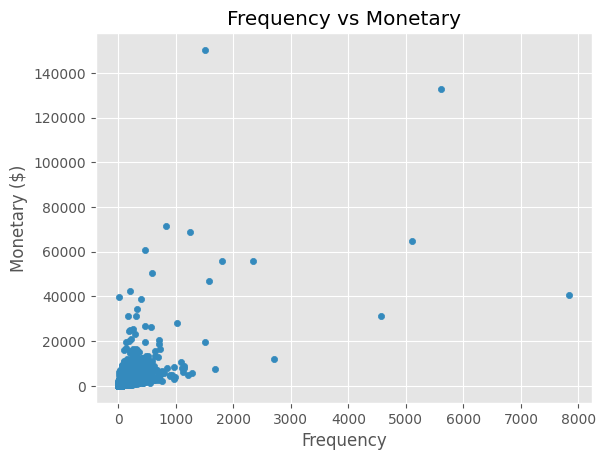

In [49]:
plt.figure(figsize=(8,7))
rfm_table.plot.scatter(x='Frequency' , y='Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary ($)')
plt.title('Frequency vs Monetary')
plt.show()

<Figure size 800x700 with 0 Axes>

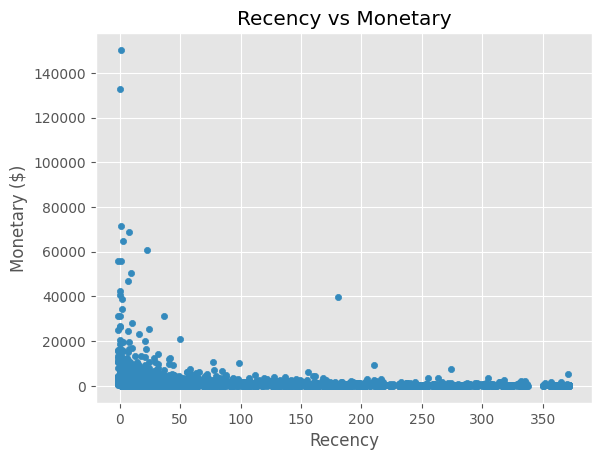

In [50]:
 plt.figure(figsize=(8,7))
rfm_table.plot.scatter(x='Recency' , y='Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary ($)')
plt.title('Recency vs Monetary')
plt.show()

In [51]:
rfm_table

,Recency,Frequency,Monetary,Country,R_quartile,F_quartile,M_quartile,RFM_Score,customer_title,detail_cust_title,rank
CustomerID,,,,,,,,,,,
12347.0,1,181,4060.40,[Iceland],4,4,4,444,Platinum,Platinum Customer,1
12348.0,74,20,1195.08,[Finland],2,2,3,223,Silver,High Risk Customer,8
12349.0,17,73,1757.55,[Italy],3,3,4,334,Gold,Potential Customer,5
12350.0,309,17,334.40,[Norway],1,1,2,112,Bronze,Evasive Customer,10
12352.0,35,85,2506.04,[Norway],3,3,4,334,Gold,Potential Customer,5
...,...,...,...,...,...,...,...,...,...,...,...
18280.0,276,10,180.60,[United Kingdom],1,1,1,111,Bronze,Lost Customer,11
18281.0,179,7,80.82,[United Kingdom],1,1,1,111,Bronze,Lost Customer,11
18282.0,6,12,178.05,[United Kingdom],4,1,1,411,Gold,Recent Customer,4


In [52]:
rfm_table = rfm_table.reset_index().rename(columns={"index":"CustomerID"})		
rfm_table

,CustomerID,Recency,Frequency,Monetary,Country,R_quartile,F_quartile,M_quartile,RFM_Score,customer_title,detail_cust_title,rank
0,12347.0,1,181,4060.40,[Iceland],4,4,4,444,Platinum,Platinum Customer,1
1,12348.0,74,20,1195.08,[Finland],2,2,3,223,Silver,High Risk Customer,8
2,12349.0,17,73,1757.55,[Italy],3,3,4,334,Gold,Potential Customer,5
3,12350.0,309,17,334.40,[Norway],1,1,2,112,Bronze,Evasive Customer,10
4,12352.0,35,85,2506.04,[Norway],3,3,4,334,Gold,Potential Customer,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4298,18280.0,276,10,180.60,[United Kingdom],1,1,1,111,Bronze,Lost Customer,11
4299,18281.0,179,7,80.82,[United Kingdom],1,1,1,111,Bronze,Lost Customer,11
4300,18282.0,6,12,178.05,[United Kingdom],4,1,1,411,Gold,Recent Customer,4
4301,18283.0,2,756,2094.88,[United Kingdom],4,4,4,444,Platinum,Platinum Customer,1


In [53]:
# Calculating the number of unique customers under a customer title.

cust_per_title = rfm_table[['detail_cust_title','CustomerID','rank']].drop_duplicates().groupby(
    ['detail_cust_title','rank']).size().reset_index().sort_values('rank')
cust_per_title.rename(columns={0:'Number of Customers'}, inplace=True)
cust_per_title

,detail_cust_title,rank,Number of Customers
7,Platinum Customer,1,441
10,Very Loyal,2,331
1,Becoming Loyal,3,217
9,Recent Customer,4,329
8,Potential Customer,5,488
4,Late Bloomer,6,351
5,Loosing Customer,7,469
3,High Risk Customer,8,420
0,Almost Lost Customer,9,404
2,Evasive Customer,10,464


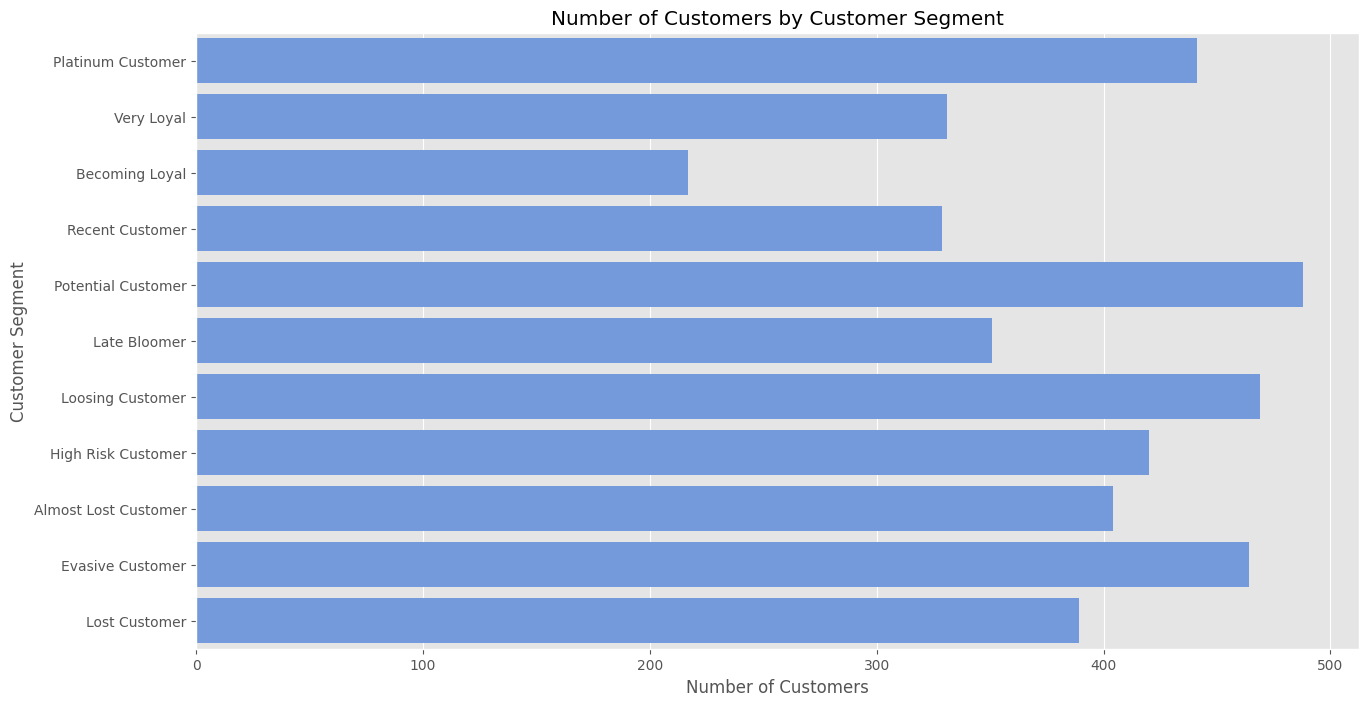

In [54]:
# Plotting the Number of Customers
plt.figure(figsize=(15,8))
sns.barplot(y='detail_cust_title' , x='Number of Customers',color='#6495ED' ,data=cust_per_title)
plt.xlabel('Number of Customers')
plt.ylabel('Customer Segment')
plt.title('Number of Customers by Customer Segment')
plt.show()

<Axes: ylabel='Description'>

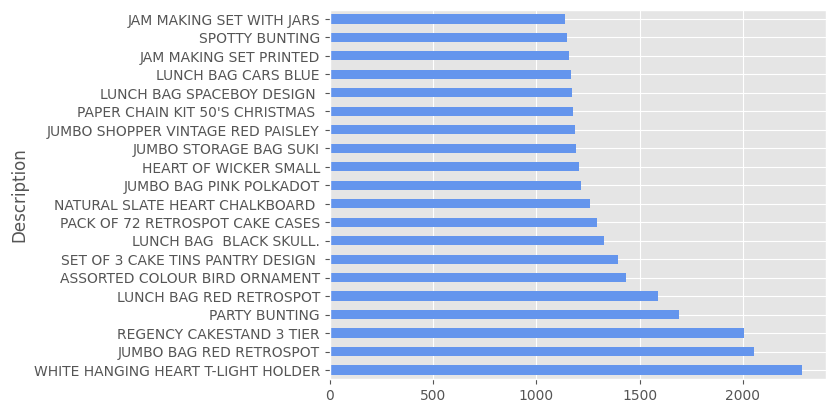

In [55]:
 RE_data['Description'].value_counts().nlargest(20).plot(kind='barh',color='#6495ED')